In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/MyDrive/datasets/employee_data.csv")

Mounted at /content/drive


In [ ]:
df.head(100)

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes
...,...,...,...,...,...,...,...,...
95,96,Daniel Allen,29,HR,53000,3,79,No
96,97,Thomas Harris,40,Engineering,91000,13,92,Yes
97,98,Michael Lewis,45,Sales,75000,16,89,No
98,99,Linda Young,50,HR,70000,21,87,Yes


In [ ]:
df.isnull().sum()


,0
EmployeeID,0
Name,0
Age,0
Department,0
Salary,0
YearsAtCompany,0
PerformanceScore,0
Attrition,0


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [ ]:
df.describe()


,EmployeeID,Age,Salary,YearsAtCompany,PerformanceScore
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,36.570000,72820.000000,10.800000,84.940000
std,29.011492,8.318478,12643.823102,6.361183,6.349771
min,1.000000,25.000000,43000.000000,1.000000,70.000000
25%,25.750000,29.750000,65000.000000,5.000000,80.000000
50%,50.500000,35.000000,72000.000000,10.000000,85.500000
75%,75.250000,41.250000,82750.000000,16.000000,90.000000
max,100.000000,60.000000,95000.000000,25.000000,95.000000


In [ ]:
print(df.columns)

Index(['EmployeeID', 'Name', 'Age', 'Department', 'Salary', 'YearsAtCompany',
       'PerformanceScore', 'Attrition'],
      dtype='object')


In [ ]:
df.describe()

,EmployeeID,Age,Salary,YearsAtCompany,PerformanceScore
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,36.570000,72820.000000,10.800000,84.940000
std,29.011492,8.318478,12643.823102,6.361183,6.349771
min,1.000000,25.000000,43000.000000,1.000000,70.000000
25%,25.750000,29.750000,65000.000000,5.000000,80.000000
50%,50.500000,35.000000,72000.000000,10.000000,85.500000
75%,75.250000,41.250000,82750.000000,16.000000,90.000000
max,100.000000,60.000000,95000.000000,25.000000,95.000000


In [ ]:
df['Attrition'].value_counts(normalize=True)


,proportion
Attrition,
No,0.61
Yes,0.39


<Axes: >

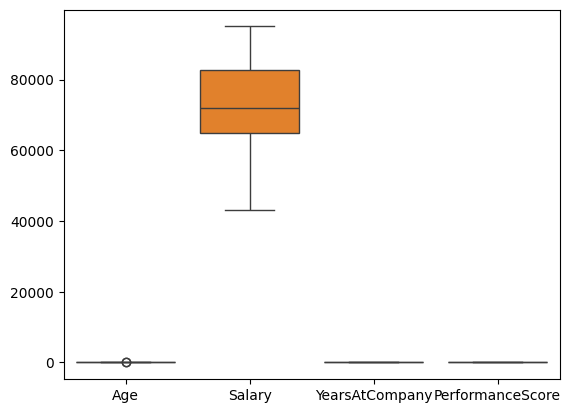

In [ ]:
sns.boxplot(data=df[['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']])


<Axes: xlabel='Department', ylabel='Salary'>

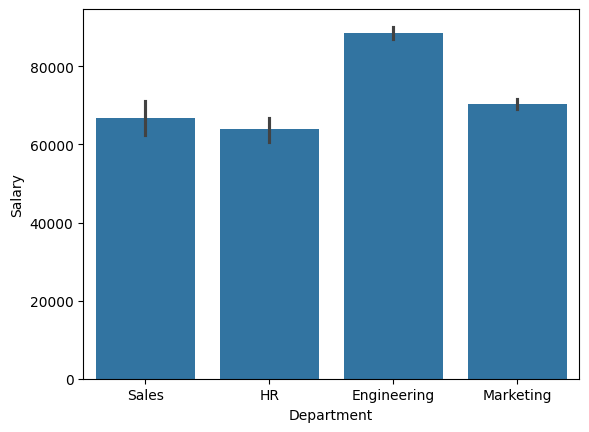

In [ ]:
sns.barplot(x='Department', y='Salary', data=df)

In [ ]:
df['Attrition_numeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df.groupby('Department')['Attrition_numeric'].mean().sort_values()

,Attrition_numeric
Department,
Marketing,0.200000
HR,0.346154
Engineering,0.428571
Sales,0.538462


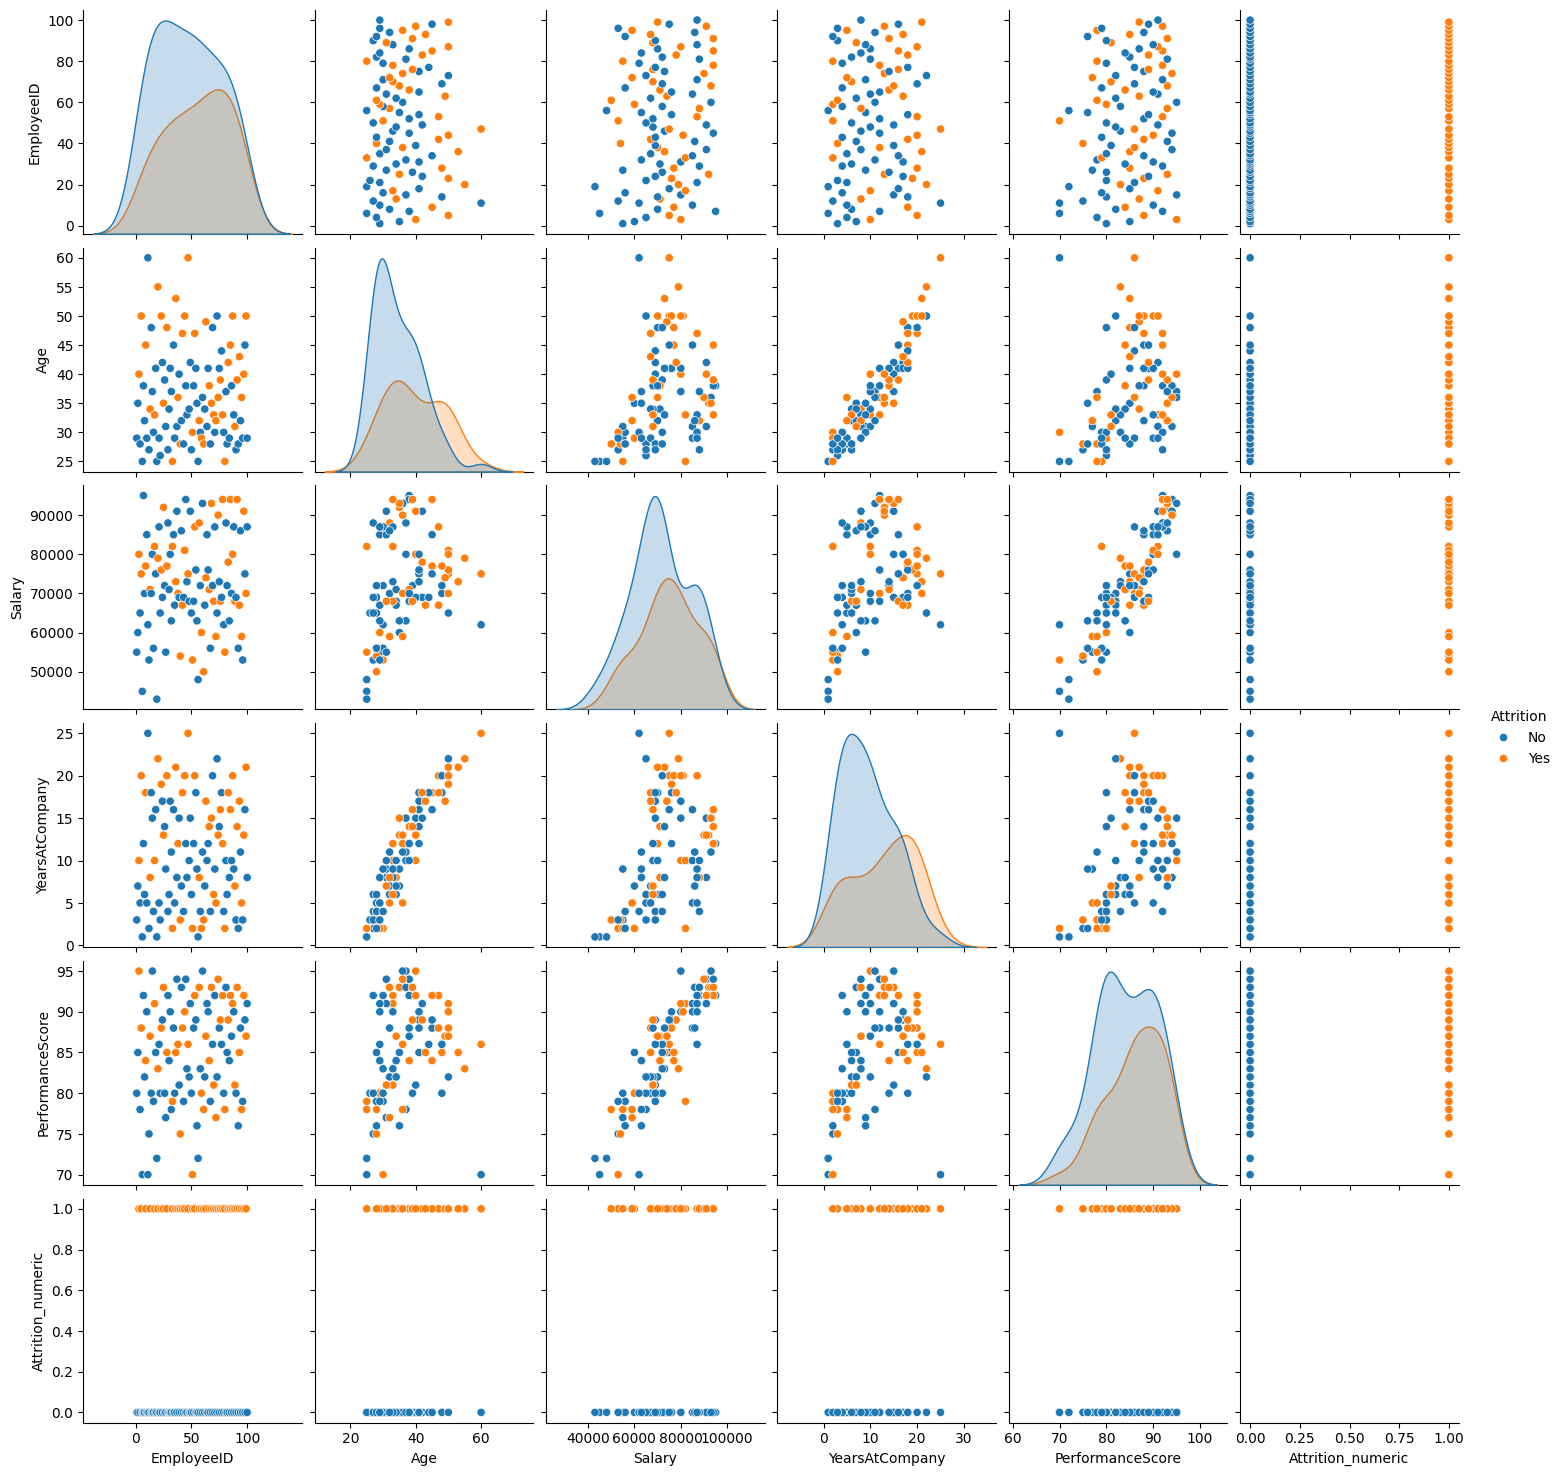

In [ ]:
sns.pairplot(df, hue='Attrition')


<Axes: >

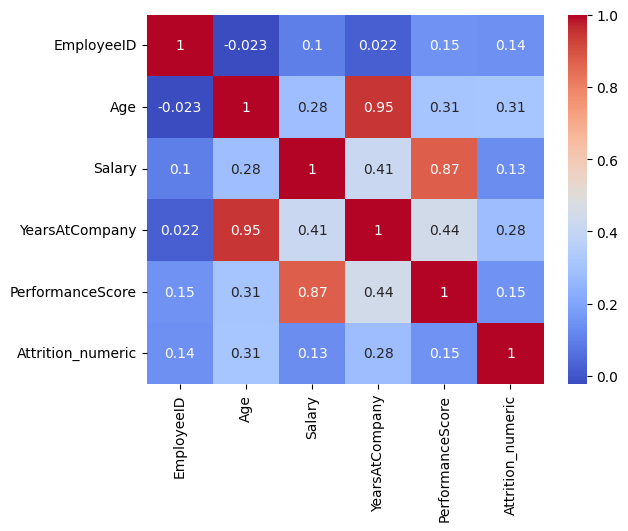

In [ ]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')


<Axes: xlabel='Attrition', ylabel='Age'>

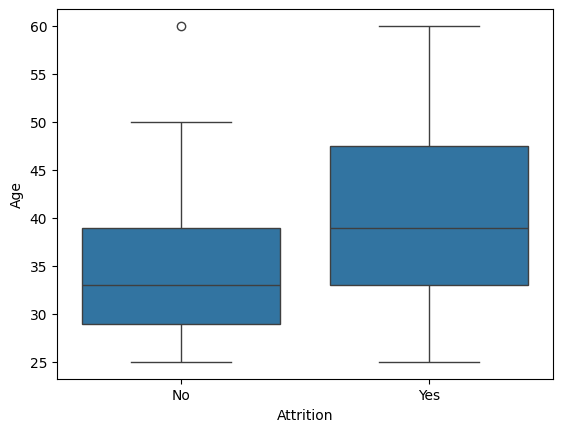

In [ ]:
sns.boxplot(x='Attrition', y='Age', data=df)


<Axes: xlabel='Attrition', ylabel='Salary'>

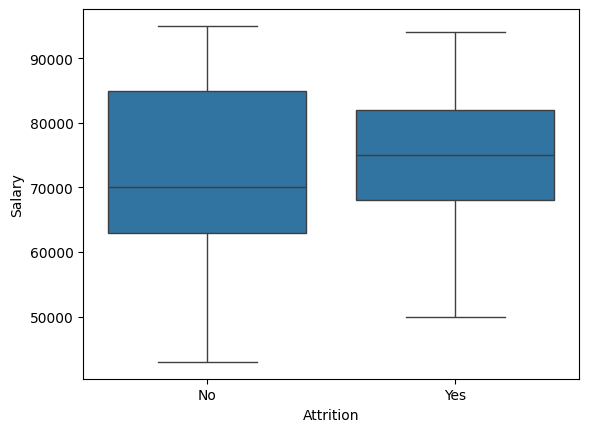

In [ ]:
sns.boxplot(x='Attrition', y='Salary', data=df)


<Axes: xlabel='Department', ylabel='count'>

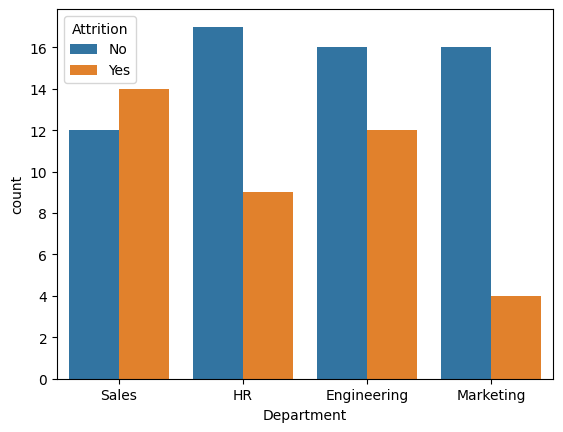

In [ ]:
sns.countplot(x='Department', hue='Attrition', data=df)


In [ ]:
label_encoders = {}
for col in ['Attrition', 'Department']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for inverse_transform if needed

# Scaling numerical features
scaler = MinMaxScaler()
df[['Salary', 'PerformanceScore']] = scaler.fit_transform(df[['Salary', 'PerformanceScore']])

# Preview the transformed DataFrame
print(df.head())

   EmployeeID           Name  Age  Department    Salary  YearsAtCompany  \
0           1       John Doe   29           3  0.230769               3   
1           2     Jane Smith   35           1  0.326923               7   
2           3  Michael Brown   40           0  0.711538              10   
3           4    Emily Davis   28           2  0.423077               5   
4           5  David Johnson   50           3  0.615385              20   

   PerformanceScore  Attrition  Attrition_numeric  
0              0.40          0                  0  
1              0.60          0                  0  
2              1.00          1                  1  
3              0.32          0                  0  
4              0.72          1                  1  


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


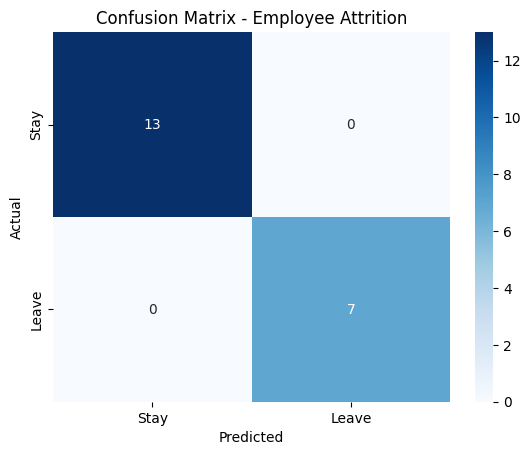

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define features (X) and target (y)
X = df.drop(['Attrition', 'Name','EmployeeID'], axis=1)  # Drop target and non-numeric ID
y = df['Attrition']

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a classifier (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Evaluate the model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")

# 6. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Stay', 'Leave'], yticklabels=['Stay', 'Leave'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Employee Attrition")
plt.show()


Mean Squared Error (MSE): 0.02
R-squared (R²): 0.75


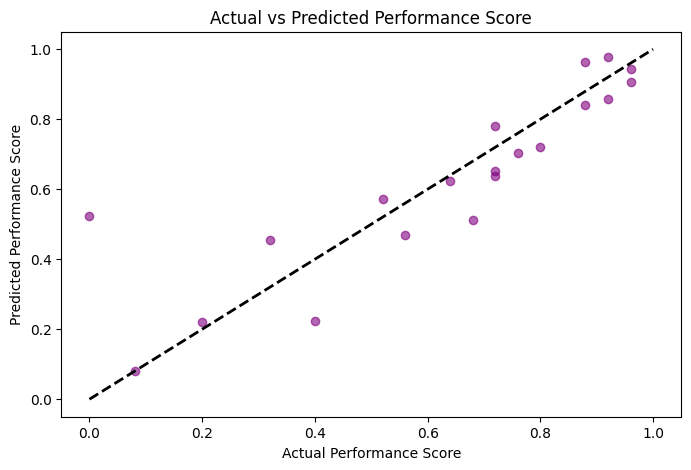

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Define features (X) and target (y) for regression
X = df.drop(['PerformanceScore', 'Name'], axis=1)
y = df['PerformanceScore']

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Linear Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# 4. Predict
y_pred = reg_model.predict(X_test)

# 5. Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# 6. Visualization of Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs Predicted Performance Score")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np


In [ ]:
# Features and Target
X = df[['Age', 'Department', 'Salary', 'YearsAtCompany', 'Attrition_numeric']]
y = df['PerformanceScore']

# Normalize the input features (if not already)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Input + hidden layer
    Dense(32, activation='relu'),                              # Hidden layer
    Dense(1)                                                    # Output layer (regression)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=1)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.7986 - mse: 0.7986 - val_loss: 0.5667 - val_mse: 0.5667
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3784 - mse: 0.3784 - val_loss: 0.2455 - val_mse: 0.2455
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1477 - mse: 0.1477 - val_loss: 0.1050 - val_mse: 0.1050
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0691 - mse: 0.0691 - val_loss: 0.0537 - val_mse: 0.0537
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0534 - mse: 0.0534 - val_loss: 0.0381 - val_mse: 0.0381
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0410 - mse: 0.0410 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0328 - mse: 0.0328 - val_loss: 0.0274 - val_mse: 0.0274
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0276 - mse: 

In [ ]:
mse_test = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest MSE: {mse_test[0]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 0.0159 - mse: 0.0159

Test MSE: 0.0159


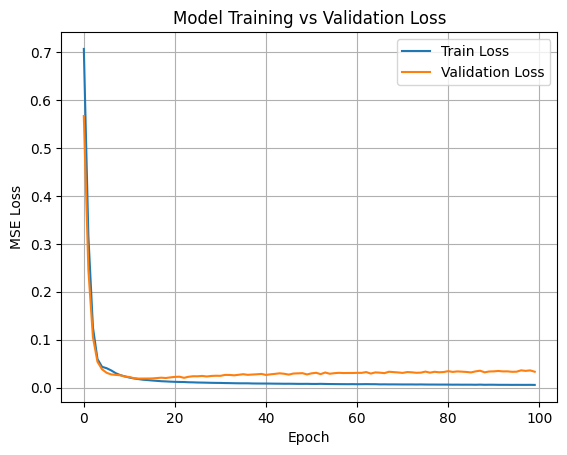

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Model Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
X = df[['Age', 'Department', 'PerformanceScore', 'Salary', 'YearsAtCompany']]
y = df['Attrition_numeric']  # 0 = No, 1 = Yes


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=1)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5559 - loss: 0.6919 - val_accuracy: 0.5625 - val_loss: 0.6986
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6268 - loss: 0.6913 - val_accuracy: 0.5625 - val_loss: 0.6984
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6367 - loss: 0.6821 - val_accuracy: 0.5625 - val_loss: 0.6997
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6506 - loss: 0.6739 - val_accuracy: 0.5625 - val_loss: 0.6987
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6143 - loss: 0.6747 - val_accuracy: 0.5625 - val_loss: 0.6959
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7219 - loss: 0.6462 - val_accuracy: 0.5625 - val_loss: 0.6977
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5907 - loss: 0.6771 - val_accuracy: 0.5625 - val_loss: 0.6924
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5095 - loss: 0.6915 - val_accuracy: 0.5625 - val_loss:

In [ ]:
# Predict probabilities and convert to class labels
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Evaluation metrics
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["No Attrition", "Attrition"]))

# Optional: Confusion Matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Classification Report:

              precision    recall  f1-score   support

No Attrition       0.75      0.69      0.72        13
   Attrition       0.50      0.57      0.53         7

    accuracy                           0.65        20
   macro avg       0.62      0.63      0.63        20
weighted avg       0.66      0.65      0.65        20

Confusion Matrix:

[[9 4]
 [3 4]]


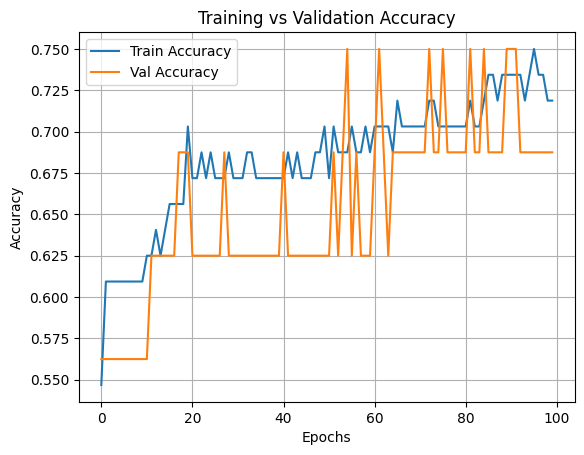

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
